In [14]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)

import support_comparison as sp  
import pickle

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [15]:
df=pd.read_pickle("../results/df_encoded_balanced.pkl")

In [16]:
x=df.drop("Attrition",axis=1)
y=df[["Attrition"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [17]:
from sklearn.svm import SVC
modelo_svm = SVC(probability=True)

In [18]:
with open('../models/mejor_modelo_logistic_regression.pkl', 'rb') as f:
        modelo_logistic_regression = pickle.load(f)
y_test_pred_modelo_logistic_regression=modelo_logistic_regression.predict(x_test)
y_train_pred_modelo_logistic_regression=modelo_logistic_regression.predict(x_train)
metricas_modelo_logistic_regression=sp.metricas(y_train, y_train_pred_modelo_logistic_regression, y_test, y_test_pred_modelo_logistic_regression)
metricas_modelo_logistic_regression

,train,test
accuracy,0.742077,0.725146
precision,0.742715,0.726273
recall,0.742077,0.725146
f1,0.742038,0.725376
kappa,0.484378,0.449709


In [19]:
with open('../models/mejor_modelo_tree.pkl', 'rb') as f:
        modelo_tree = pickle.load(f)
y_test_pred_modelo_tree=modelo_tree.predict(x_test)
y_train_pred_modelo_tree=modelo_tree.predict(x_train)
metricas_modelo_tree=sp.metricas(y_train, y_train_pred_modelo_tree, y_test, y_test_pred_modelo_tree)
metricas_modelo_tree

,train,test
accuracy,0.956607,0.855750
precision,0.956652,0.857678
recall,0.956607,0.855750
f1,0.956602,0.855882
kappa,0.913179,0.711535


In [20]:
with open('../models/mejor_modelo_random_forest.pkl', 'rb') as f:
        modelo_random_forest = pickle.load(f)
y_test_pred_modelo_random_forest=modelo_random_forest.predict(x_test)
y_train_pred_modelo_random_forest=modelo_random_forest.predict(x_train)
metricas_modelo_random_forest=sp.metricas(y_train, y_train_pred_modelo_random_forest, y_test, y_test_pred_modelo_random_forest)
metricas_modelo_random_forest

,train,test
accuracy,1.0,0.925926
precision,1.0,0.935002
recall,1.0,0.925926
f1,1.0,0.925875
kappa,1.0,0.852564


In [21]:
with open('../models/mejor_modelo_gradient_boosting.pkl', 'rb') as f:
        modelo_gradient_boosting = pickle.load(f)
y_test_pred_modelo_gradient_boosting=modelo_gradient_boosting.predict(x_test)
y_train_pred_modelo_gradient_boosting=modelo_gradient_boosting.predict(x_train)
metricas_modelo_gradient_boosting=sp.metricas(y_train, y_train_pred_modelo_gradient_boosting, y_test, y_test_pred_modelo_gradient_boosting)
metricas_modelo_gradient_boosting

,train,test
accuracy,1.0,0.902534
precision,1.0,0.907275
recall,1.0,0.902534
f1,1.0,0.902582
kappa,1.0,0.805549


In [22]:
with open('../models/mejor_modelo_xgboost.pkl', 'rb') as f:
        modelo_xgboost = pickle.load(f)
y_test_pred_modelo_xgboost=modelo_xgboost.predict(x_test)
y_train_pred_modelo_xgboost=modelo_xgboost.predict(x_train)
metricas_modelo_xgboost=sp.metricas(y_train, y_train_pred_modelo_xgboost, y_test, y_test_pred_modelo_xgboost)
metricas_modelo_xgboost

,train,test
accuracy,0.991224,0.898635
precision,0.991314,0.905633
recall,0.991224,0.898635
f1,0.991222,0.898623
kappa,0.982440,0.798056


In [23]:
lista_nombres_modelos=["modelo_logistic_regression","modelo_tree","modelo_random_forest","modelo_gradient_boosting","modelo_xgboost"]

In [24]:
sp.combinar_metricas(lista_nombres_modelos,metricas_modelo_logistic_regression, metricas_modelo_tree, metricas_modelo_random_forest, metricas_modelo_gradient_boosting, metricas_modelo_xgboost)

,accuracy,precision,recall,f1,kappa,Modelo
train,0.742077,0.742715,0.742077,0.742038,0.484378,modelo_logistic_regression
test,0.725146,0.726273,0.725146,0.725376,0.449709,modelo_logistic_regression
train,0.956607,0.956652,0.956607,0.956602,0.913179,modelo_tree
test,0.855750,0.857678,0.855750,0.855882,0.711535,modelo_tree
train,1.000000,1.000000,1.000000,1.000000,1.000000,modelo_random_forest
test,0.925926,0.935002,0.925926,0.925875,0.852564,modelo_random_forest
train,1.000000,1.000000,1.000000,1.000000,1.000000,modelo_gradient_boosting
test,0.902534,0.907275,0.902534,0.902582,0.805549,modelo_gradient_boosting
train,0.991224,0.991314,0.991224,0.991222,0.982440,modelo_xgboost
test,0.898635,0.905633,0.898635,0.898623,0.798056,modelo_xgboost


1. Logistic Regression
La regresión logística muestra un desempeño estable con una precisión del 74.2% en entrenamiento y 72.5% en prueba. Este modelo es simple y generaliza razonablemente bien, ya que no hay una gran diferencia entre ambos conjuntos, pero su rendimiento global es limitado para problemas complejos. Es adecuado como punto de partida o para interpretar relaciones básicas en los datos, aunque no captura interacciones complejas entre variables.

2. Árbol de Decisión
El árbol de decisión tiene un rendimiento excelente en el conjunto de entrenamiento (95.7%), pero esto sugiere un sobreajuste cuando se compara con su precisión en prueba (85.6%). Aunque generaliza mejor que Logistic Regression, la diferencia entre ambos conjuntos indica que el modelo memoriza patrones específicos del entrenamiento. Es una opción atractiva por su interpretabilidad, pero necesita ajustes en los parámetros, como la profundidad del árbol, para evitar el sobreajuste.

3. Random Forest
Random Forest sobresale con un 100% de precisión en entrenamiento y un sólido 92.6% en prueba. Aunque el rendimiento en prueba es muy bueno, el hecho de que alcance el 100% en entrenamiento sugiere un sobreajuste considerable. Su capacidad para manejar datos complejos lo convierte en un modelo robusto, pero sería ideal ajustar hiperparámetros como el número de árboles y su profundidad para mejorar la generalización sin sacrificar precisión.

4. Gradient Boosting
Gradient Boosting tiene un rendimiento competitivo, con 100% en entrenamiento y 90.3% en prueba, mostrando una ligera mejora en generalización en comparación con Random Forest. Este modelo es menos propenso al sobreajuste y suele ser más eficiente computacionalmente. Aunque su Kappa es ligeramente inferior (0.80), es una opción sólida para problemas complejos, especialmente si el tiempo de entrenamiento es una consideración importante.

5. XGBoost
XGBoost ofrece un equilibrio entre rendimiento y eficiencia, con 99.1% de precisión en entrenamiento y 89.9% en prueba. Aunque no alcanza la precisión de Gradient Boosting en prueba, es altamente competitivo y tiene la ventaja de ser más rápido y flexible en ajustes de hiperparámetros. Su Kappa (0.80) indica un modelo confiable, ideal para casos donde la eficiencia y la posibilidad de ajustes detallados sean prioridades.

- Conclusión
Random Forest lidera en rendimiento, pero muestra un claro sobreajuste que debe corregirse. Gradient Boosting y XGBoost son alternativas excelentes con mejor balance entre generalización y eficiencia, siendo Gradient Boosting algo más robusto y XGBoost más rápido. Logistic Regression y el Árbol de Decisión son útiles como referencias o para problemas más simples, pero no capturan tanta complejidad como los otros modelos.

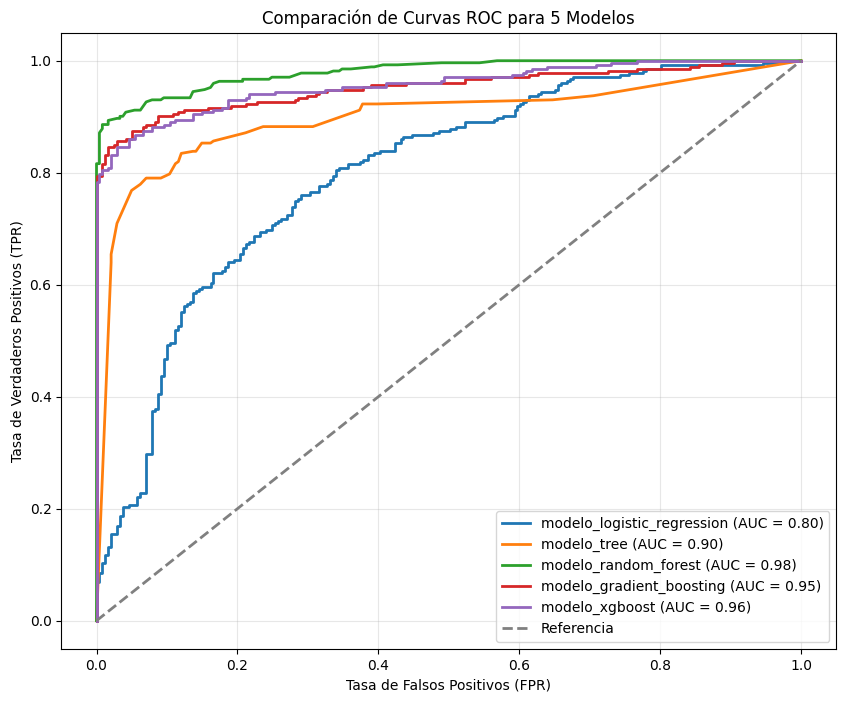

In [25]:
lista_modelos=[modelo_logistic_regression,modelo_tree,modelo_random_forest,modelo_gradient_boosting,modelo_xgboost]
sp.comparador_curvas_auc(lista_modelos, x_test, y_test, lista_nombres_modelos)

1. Logistic Regression (AUC = 0.80)
La curva de la regresión logística está notablemente por debajo de las demás, lo que refleja que tiene menos capacidad para separar correctamente las clases positivas y negativas. Aunque el modelo es simple, esta AUC indica que no es ideal para problemas complejos, ya que se queda rezagado frente a otros modelos más avanzados.

2. Árbol de Decisión (AUC = 0.90)
El árbol de decisión tiene un buen desempeño con una AUC respetable de 0.90. Su curva se eleva temprano, mostrando que logra capturar una proporción considerable de verdaderos positivos con pocos falsos positivos. Sin embargo, no alcanza la precisión y discriminación de los modelos más avanzados, lo que limita su utilidad en comparación.

3. Random Forest (AUC = 0.98)
Este modelo domina el gráfico con una curva casi perfecta y una AUC de 0.98. Indica que tiene una excelente capacidad para separar las clases, siendo el mejor modelo en términos de rendimiento puro. Esto coincide con sus altas métricas de prueba, aunque el sobreajuste en entrenamiento sigue siendo una preocupación.

4. Gradient Boosting (AUC = 0.95)
Gradient Boosting también muestra un rendimiento excelente, con una AUC de 0.95. Su curva es cercana a la de Random Forest, lo que indica que es casi igual de eficaz en discriminar entre clases. Este modelo logra un buen equilibrio entre rendimiento y generalización, lo que lo convierte en una opción confiable.

5. XGBoost (AUC = 0.96)
XGBoost ofrece un rendimiento muy similar a Gradient Boosting, con una AUC ligeramente superior de 0.96. Su curva es casi indistinguible de Gradient Boosting, lo que demuestra que también es una opción sólida para este problema, con la ventaja adicional de ser más rápido en entrenamiento y flexible en ajustes.

- Conclusión General
Random Forest es el modelo con mejor desempeño, pero Gradient Boosting y XGBoost también son opciones muy competitivas con un excelente balance entre precisión y eficiencia. Logistic Regression y Árbol de Decisión quedan relegados como modelos base o de referencia. La elección entre Gradient Boosting y XGBoost dependerá del tiempo de entrenamiento y de la necesidad de optimización.

C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


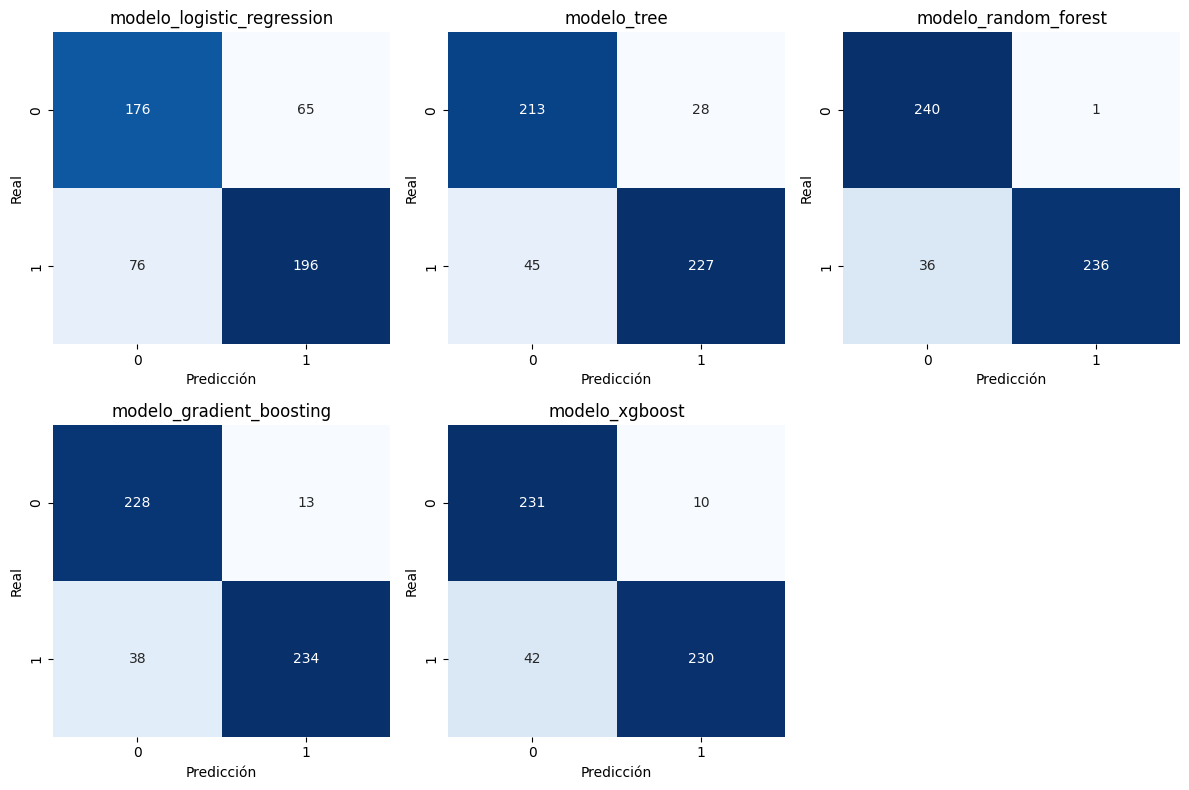

In [26]:
sp.comparar_matrices_confusion(x_train, y_train, x_test, y_test, lista_modelos, lista_nombres_modelos, figsize=(12, 8))

1. Logistic Regression
- Predicciones correctas: 176 (negativos) y 196 (positivos).
- Errores: 65 falsos positivos y 76 falsos negativos.
- Conclusión: Este modelo tiene una tasa de falsos negativos relativamente alta, lo que podría ser un problema si identificar correctamente la clase positiva es crucial. Aunque generaliza moderadamente, no es tan preciso como los otros modelos.
2. Árbol de Decisión
- Predicciones correctas: 213 (negativos) y 227 (positivos).
- Errores: 28 falsos positivos y 45 falsos negativos.
- Conclusión: Este modelo mejora significativamente sobre Logistic Regression, con menos errores en ambas clases. Es capaz de identificar positivos con mayor precisión, pero aún tiene margen de mejora comparado con modelos más avanzados.
3. Random Forest
- Predicciones correctas: 240 (negativos) y 236 (positivos).
- Errores: 1 falso positivo y 36 falsos negativos.
- Conclusión: Random Forest destaca como el modelo más equilibrado, con muy pocos errores. Su capacidad para identificar correctamente negativos y positivos lo convierte en una opción altamente confiable para tareas críticas.
4. Gradient Boosting
- Predicciones correctas: 228 (negativos) y 234 (positivos).
- Errores: 13 falsos positivos y 38 falsos negativos.
- Conclusión: Gradient Boosting también ofrece un desempeño sobresaliente, con un ligero aumento en los falsos negativos comparado con Random Forest. Sin embargo, sigue siendo una alternativa muy sólida para problemas donde se requiera un buen balance entre precisión y eficiencia.
5. XGBoost
- Predicciones correctas: 231 (negativos) y 230 (positivos).
- Errores: 10 falsos positivos y 42 falsos negativos.
- Conclusión: XGBoost está muy cerca de Gradient Boosting en desempeño, con un leve aumento en los falsos negativos. Su precisión es casi idéntica, pero puede ser más eficiente en términos de recursos y tiempo de entrenamiento.
